In [8]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [9]:
train_raw = pd.read_csv(r"C:\REAL TIME PROJECTS\DEMAND FORECASTING\DATA\train.csv")
meal = pd.read_csv(r"C:\REAL TIME PROJECTS\DEMAND FORECASTING\DATA\meal_info.csv")
centerinfo = pd.read_csv(r"C:\REAL TIME PROJECTS\DEMAND FORECASTING\DATA\fulfilment_center_info.csv")

In [10]:
print(train_raw.shape) # data for training the model
print(meal.shape) # informaton of meal type and cuisine
print(centerinfo.shape) # area informaton

(456548, 9)
(51, 3)
(77, 5)


In [11]:
train_raw.head()

id  week  center_id  meal_id  checkout_price  base_price   
0  1379560     1         55     1885          136.83      152.29  \
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40

In [12]:
meal.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [13]:
train_raw.isnull().sum().sum()

0

In [14]:
meal.isnull().sum().sum()

0

In [15]:
# here we have no missing values

In [16]:
#Merge train data with meal and center info
train = pd.merge(train_raw, meal, on="meal_id", how="left")
train = pd.merge(train, centerinfo, on="center_id", how="left")
print("Shape of train data : ", train.shape)
train.head()

Shape of train data :  (456548, 15)


id  week  center_id  meal_id  checkout_price  base_price   
0  1379560     1         55     1885          136.83      152.29  \
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine   
0                      0                  0         177  Beverages    Thai  \
1                      0                  0         270  Beverages    Thai   
2                      0                  0         189  Beverages    Thai   
3                      0                  0          54  Beverages  Indian   
4                      0                  0          40  Beverages  Indian   

   city_code  region_code center_type  op_area  
0        647           56      TYPE_C      2.0  
1        647           56      TYPE_C      2.0  
2        647           56      TYPE_C      2.0  
3        647           56      TYPE_C      2.0  
4        647           56      TYPE_C      2.0

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [18]:
train.describe()

id           week      center_id        meal_id   
count  4.565480e+05  456548.000000  456548.000000  456548.000000  \
mean   1.250096e+06      74.768771      82.105796    2024.337458   
std    1.443548e+05      41.524956      45.975046     547.420920   
min    1.000000e+06       1.000000      10.000000    1062.000000   
25%    1.124999e+06      39.000000      43.000000    1558.000000   
50%    1.250184e+06      76.000000      76.000000    1993.000000   
75%    1.375140e+06     111.000000     110.000000    2539.000000   
max    1.499999e+06     145.000000     186.000000    2956.000000   

       checkout_price     base_price  emailer_for_promotion   
count   456548.000000  456548.000000          456548.000000  \
mean       332.238933     354.156627               0.081152   
std        152.939723     160.715914               0.273069   
min          2.970000      55.350000               0.000000   
25%        228.950000     243.500000               0.000000   
50%        296.820000     310.460000               0.000000   
75%        445.230000     458.870000               0.000000   
max        866.270000     866.270000               1.000000   

       homepage_featured     num_orders      city_code    region_code   
count       456548.00000  456548.000000  456548.000000  456548.000000  \
mean             0.10920     261.872760     601.553399      56.614566   
std              0.31189     395.922798      66.195914      17.641306   
min              0.00000      13.000000     456.000000      23.000000   
25%              0.00000      54.000000     553.000000      34.000000   
50%              0.00000     136.000000     596.000000      56.000000   
75%              0.00000     324.000000     651.000000      77.000000   
max              1.00000   24299.000000     713.000000      93.000000   

             op_area  
count  456548.000000  
mean        4.083590  
std         1.091686  
min         0.900000  
25%         3.600000  
50%         4.000000  
75%         4.500000  
max         7.000000

In [19]:
# DATA ANALYSIS

In [27]:
promotion = [1]
email = train_raw.loc[train['emailer_for_promotion'].isin(promotion)]
print('Promotion voucher meals count:',email['meal_id'].count())
print('Overall orders for promotional orders:', email['num_orders'].sum())

Promotion voucher meals count: 37050
Overall orders for promotional orders: 23382164


In [28]:
promotion = [1]
homepage = train_raw.loc[train['homepage_featured'].isin(promotion)]
print('Promotion voucher meals count:',homepage['meal_id'].count())
print('Overall orders for promotional orders:', homepage['num_orders'].sum())

Promotion voucher meals count: 49855
Overall orders for promotional orders: 29657981


In [33]:
import plotly.express as px
df = email
fig = px.line(df, x="week", y="num_orders", title='Promotions effect on sales') 
fig.show()

In [34]:
# Orders by centers
center_orders=train.groupby("center_id",as_index=False).sum()
center_orders=center_orders[["center_id","num_orders"]].sort_values(by="num_orders",ascending=False).head(10)

fig=px.bar(x=center_orders["center_id"].astype("str"),y=center_orders["num_orders"],
          title="Top 10 Centers by Order",labels={"x":"center_id","y":"num_orders"})
fig.show()

In [35]:
#Pie chart on food category

fig = px.pie(values=train["category"].value_counts(), names=train["category"].unique(),
             title="Most popular food category")
fig.show()

In [36]:
# Orders by Cuisine type

cuisine_orders=train.groupby(["cuisine"],as_index=False).sum()
cuisine_orders=cuisine_orders[["cuisine","num_orders"]].sort_values(by="num_orders",ascending=False)
fig=px.bar(cuisine_orders,x="cuisine",y="num_orders", title="orders by cuisine")
fig.show()

In [37]:
# Impact of check-out price on order
train_sample = train.sample(frac=0.2)
fig=px.scatter(train_sample,x="checkout_price",y="num_orders",title="number of order change with checkout price")
fig.show()

<Axes: >

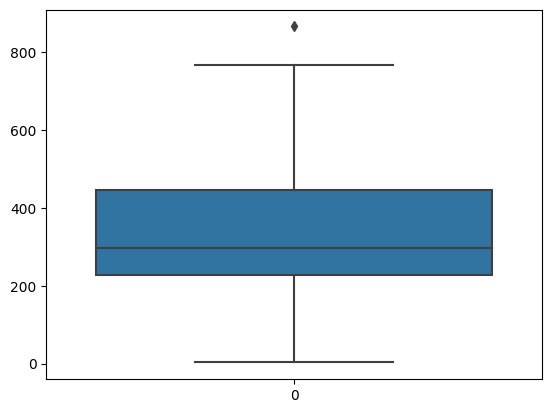

In [38]:
sb.boxplot(train["checkout_price"])

In [39]:
# orders weekly trend
week_orders=train.groupby(["week"],as_index=False).sum()
week_orders=week_orders[["week","num_orders"]]

fig = px.line(week_orders, x="week", y="num_orders",
              markers=True,title="Order weekly trend")
fig.show()

In [40]:
# Feature Engineering

In [41]:
#Discount Percent
train['discount percent'] = ((train['base_price']-train['checkout_price'])/train['base_price'])*100
#Discount Y/N
train['discount y/n'] = [1 if x>0 else 0 for x in (train['base_price']-train['checkout_price'])]

In [42]:
train.head(2)

id  week  center_id  meal_id  checkout_price  base_price   
0  1379560     1         55     1885          136.83      152.29  \
1  1466964     1         55     1993          136.83      135.83   

   emailer_for_promotion  homepage_featured  num_orders   category cuisine   
0                      0                  0         177  Beverages    Thai  \
1                      0                  0         270  Beverages    Thai   

   city_code  region_code center_type  op_area  discount percent  discount y/n  
0        647           56      TYPE_C      2.0         10.151684             1  
1        647           56      TYPE_C      2.0         -0.736214             0

In [43]:
# converting categorical data to numerical data

In [44]:
dms1 = pd.get_dummies(train["category"]).astype(int)
dms2 = pd.get_dummies(train["cuisine"]).astype(int)
dms3 = pd.get_dummies(train["center_type"]).astype(int)

In [45]:
train.drop("category",axis=1,inplace=True)
train.drop("cuisine",axis=1,inplace=True)
train.drop("center_type",axis=1,inplace=True)

In [46]:
train = pd.concat([train,dms1,dms2,dms3],axis=1)

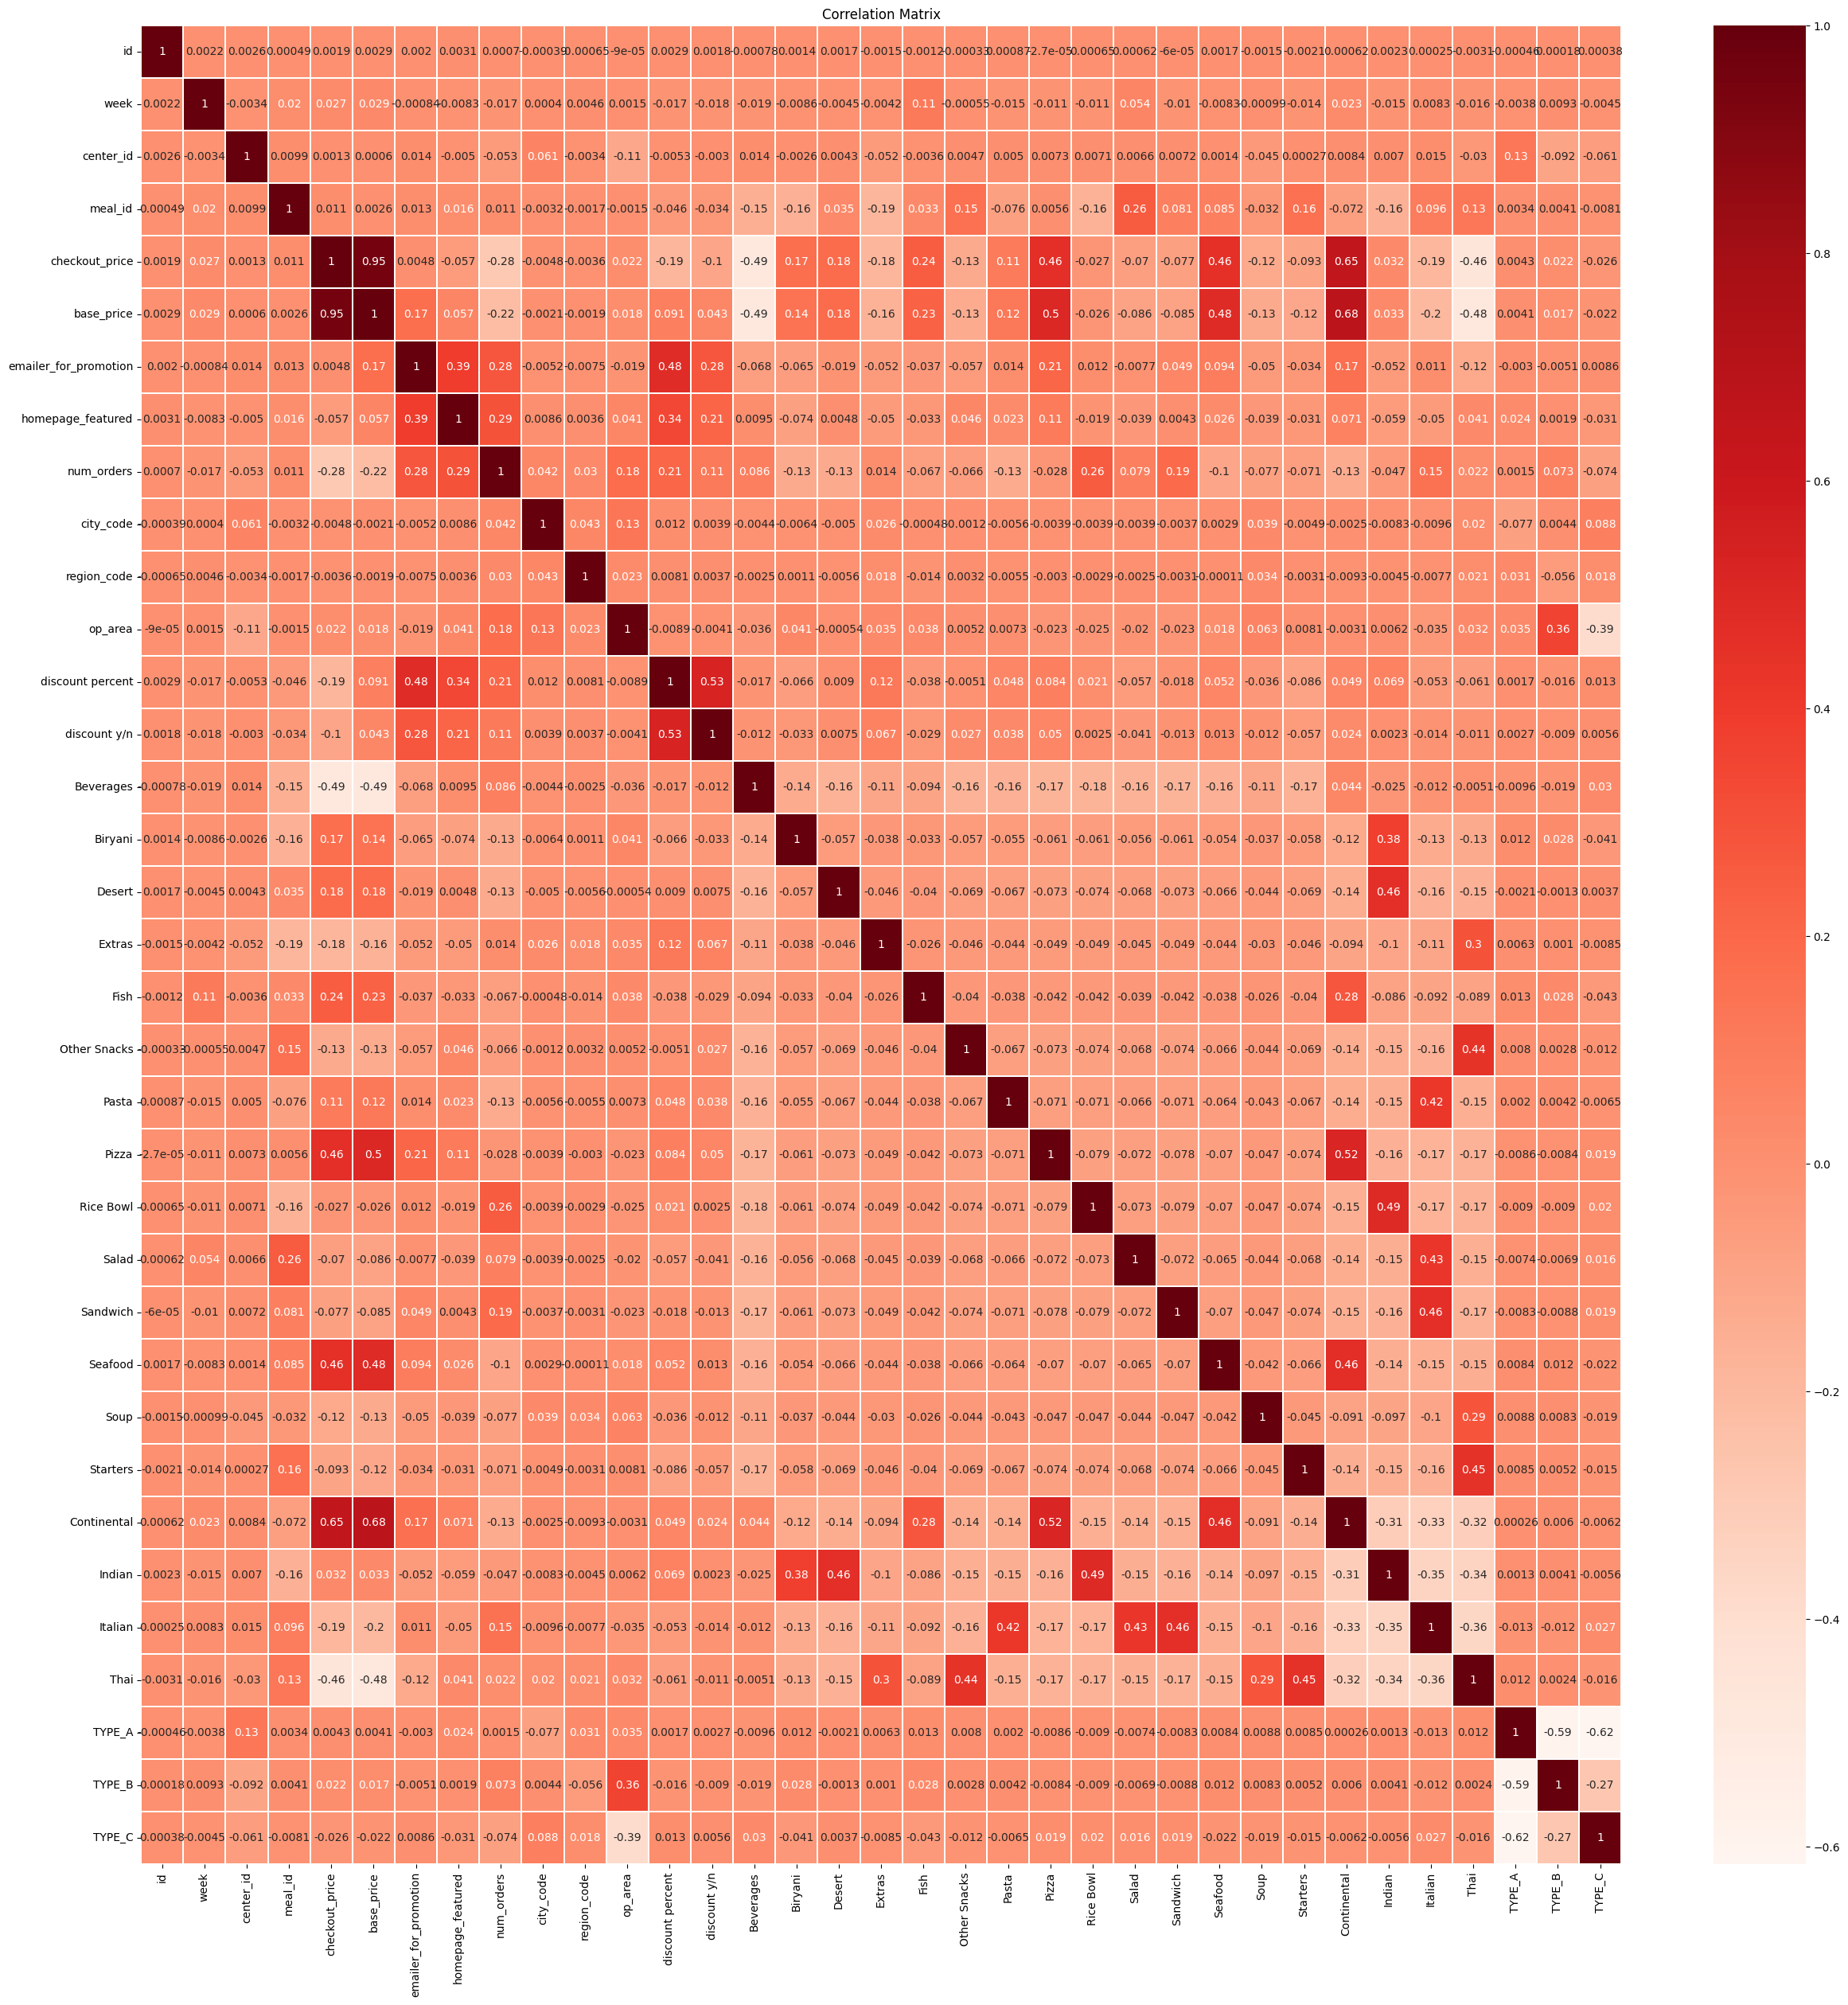

In [47]:
# Check for correlation between numeric features
mp.figure(figsize=(30,30))
sb.heatmap(train.corr(),linewidths=.1,cmap='Reds',annot=True)
mp.title('Correlation Matrix')
mp.show()

In [48]:
# MODEL BUILDING

In [49]:
from sklearn.model_selection import train_test_split 

In [50]:
x = train_raw.drop(['num_orders'], axis=1).values
y = train_raw['num_orders'].values

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from lazypredict.Supervised import LazyRegressor # used to find the rmse which tells the model performance 
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
print(models)

  2%|█▉                                                                                 | 1/42 [00:13<09:20, 13.68s/it]

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [53]:
lr = LinearRegression()  
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [54]:
knn = KNeighborsRegressor()  
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
rf = RandomForestRegressor(max_depth = 3, random_state = 0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [ ]:
svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

In [ ]:
xgb = xgb()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [2]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'bootstrap' : [True],
    'max_depth' : [50,70,100],
    'max_features' : [2,3],
    'min_sample_leaf' : [3,4,5],
    'min_sample_split' : [8,10,12],
    'n_estimators' : [100,200,300,1000]
}
rscv = RandomizedSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)